In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Input, Dense, LSTM, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
stock_data = pd.read_csv('/content/DJIA_table.csv')

In [ ]:
stock_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

In [ ]:
 news_data = pd.read_csv('RedditNews.csv')

In [ ]:
news_data

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...
73603,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
73604,2008-06-08,b'Threat of world AIDS pandemic among heterose...
73605,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
73606,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."


In [ ]:
news_data['Date'] = pd.to_datetime(news_data['Date'])
news_data = news_data.set_index('Date')

In [ ]:
news_data

,News
Date,
2016-07-01,A 117-year-old woman in Mexico City finally re...
2016-07-01,IMF chief backs Athens as permanent Olympic host
2016-07-01,"The president of France says if Brexit won, so..."
2016-07-01,British Man Who Must Give Police 24 Hours' Not...
2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
...,...
2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
2008-06-08,b'Threat of world AIDS pandemic among heterose...
2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...


In [ ]:
data = stock_data.merge(news_data, how='left', right_index=True, left_index=True)

In [ ]:
data

,Open,High,Low,Close,Volume,Adj Close,News
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'BREAKING: Musharraf to be impeached.'
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Russia Today: Columns of troops roll into So...
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Russian tanks are moving towards the capital...
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Afghan children raped with 'impunity,' U.N. ..."
...,...,...,...,...,...,...,...
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,Philippines president Rodrigo Duterte urges pe...
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,Spain arrests three Pakistanis accused of prom...
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,"Venezuela, where anger over food shortages is ..."


In [ ]:
data.columns[:-1]

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
aggregation = {
    col: 'first' for col in data.columns[:-1]
}
aggregation.update({'News': '\n'.join})

In [ ]:
data = data.groupby('Date').agg(aggregation)

In [ ]:
data

,Open,High,Low,Close,Volume,Adj Close,News
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'Why wont America and Nato help us? If they w...
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'Remember that adorable 9-year-old who sang a...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,b'All the experts admit that we should legalis...
...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ..."
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In Istanbul\nYemeni forme...


In [ ]:
data['News'][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"\nb\'BREAKING: Musharraf to be impeached.\'\nb\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'\nb\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'\nb"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing"\nb\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'\nb"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"\nb"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."\nb\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\'\nb\'Did the U.S. Prep Georgia for War with 

In [ ]:
data['News_yesterday'] = data.News.shift()

In [ ]:
data

,Open,High,Low,Close,Volume,Adj Close,News,News_yesterday
Date,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou...",None
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'Why wont America and Nato help us? If they w...,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'Remember that adorable 9-year-old who sang a...,b'Why wont America and Nato help us? If they w...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...,b'Remember that adorable 9-year-old who sang a...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,b'All the experts admit that we should legalis...,b' U.S. refuses Israel weapons to attack Iran:...
...,...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...,David Cameron to Resign as PM After EU Referen...
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ...",Barclays and RBS shares suspended from trading...
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In Istanbul\nYemeni forme...,"2,500 Scientists To Australia: If You Want To ..."


In [ ]:
numeric_feature_names = data.columns[:-2]

In [ ]:
lags = 5

In [ ]:
 for i in range(1, lags + 1):
  for col in numeric_feature_names:
    data[f'{col}_lag_{i}'] = data[col].shift(i)

In [ ]:
data

,Open,High,Low,Close,Volume,Adj Close,News,News_yesterday,Open_lag_1,High_lag_1,...,Low_lag_4,Close_lag_4,Volume_lag_4,Adj Close_lag_4,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_5,Volume_lag_5,Adj Close_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou...",None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'Why wont America and Nato help us? If they w...,"b""Georgia 'downs two Russian warplanes' as cou...",11432.089844,11759.959961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'Remember that adorable 9-year-old who sang a...,b'Why wont America and Nato help us? If they w...,11729.669922,11867.110352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...,b'Remember that adorable 9-year-old who sang a...,11781.700195,11782.349609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,b'All the experts admit that we should legalis...,b' U.S. refuses Israel weapons to attack Iran:...,11632.809570,11633.780273,...,11388.040039,11734.320312,212830000.0,11734.320312,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...,David Cameron to Resign as PM After EU Referen...,17946.630859,17946.630859,...,17799.800781,17829.730469,85130000.0,17829.730469,17736.869141,17946.359375,17736.869141,17804.869141,99380000.0,17804.869141
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ...",Barclays and RBS shares suspended from trading...,17355.210938,17355.210938,...,17770.359375,17780.830078,89440000.0,17780.830078,17827.330078,17877.839844,17799.800781,17829.730469,85130000.0,17829.730469
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In Istanbul\nYemeni forme...,"2,500 Scientists To Australia: If You Want To ...",17190.509766,17409.720703,...,17844.109375,18011.070312,98070000.0,18011.070312,17832.669922,17920.160156,17770.359375,17780.830078,89440000.0,17780.830078


In [ ]:
data = data.dropna(axis=0)

In [ ]:
data

,Open,High,Low,Close,Volume,Adj Close,News,News_yesterday,Open_lag_1,High_lag_1,...,Low_lag_4,Close_lag_4,Volume_lag_4,Adj Close_lag_4,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_5,Volume_lag_5,Adj Close_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,"b""Mom of missing gay man: Too bad he's not a 2...",b'All the experts admit that we should legalis...,11532.070312,11718.280273,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648,"b'In an Afghan prison, the majority of female ...","b""Mom of missing gay man: Too bad he's not a 2...",11611.209961,11709.889648,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,"b""Man arrested and locked up for five hours af...","b'In an Afghan prison, the majority of female ...",11659.650391,11690.429688,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,b'Two elderly Chinese women have been sentence...,"b""Man arrested and locked up for five hours af...",11478.089844,11478.169922,...,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
2008-08-21,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961,"b""British resident held in Guantanamo Bay wins...",b'Two elderly Chinese women have been sentence...,11345.940430,11454.150391,...,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...,David Cameron to Resign as PM After EU Referen...,17946.630859,17946.630859,...,17799.800781,17829.730469,85130000.0,17829.730469,17736.869141,17946.359375,17736.869141,17804.869141,99380000.0,17804.869141
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ...",Barclays and RBS shares suspended from trading...,17355.210938,17355.210938,...,17770.359375,17780.830078,89440000.0,17780.830078,17827.330078,17877.839844,17799.800781,17829.730469,85130000.0,17829.730469
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In Istanbul\nYemeni forme...,"2,500 Scientists To Australia: If You Want To ...",17190.509766,17409.720703,...,17844.109375,18011.070312,98070000.0,18011.070312,17832.669922,17920.160156,17770.359375,17780.830078,89440000.0,17780.830078


In [ ]:
numeric_feature_names = data.columns[8:]

In [ ]:
numeric_feature_names

Index(['Open_lag_1', 'High_lag_1', 'Low_lag_1', 'Close_lag_1', 'Volume_lag_1',
       'Adj Close_lag_1', 'Open_lag_2', 'High_lag_2', 'Low_lag_2',
       'Close_lag_2', 'Volume_lag_2', 'Adj Close_lag_2', 'Open_lag_3',
       'High_lag_3', 'Low_lag_3', 'Close_lag_3', 'Volume_lag_3',
       'Adj Close_lag_3', 'Open_lag_4', 'High_lag_4', 'Low_lag_4',
       'Close_lag_4', 'Volume_lag_4', 'Adj Close_lag_4', 'Open_lag_5',
       'High_lag_5', 'Low_lag_5', 'Close_lag_5', 'Volume_lag_5',
       'Adj Close_lag_5'],
      dtype='object')

In [ ]:
text_feature_names = 'News_yesterday'

In [ ]:
target = 'Close'

In [ ]:
numeric_features = data[numeric_feature_names]
text_features = data[text_feature_names]

In [ ]:
Y = data[target]

In [ ]:
X_train_numeric, X_test_numeric, Y_train, Y_test = train_test_split(numeric_features, Y, shuffle=False, test_size=0.2)

In [ ]:
X_train_text, X_test_text, _, _ = train_test_split(text_features, Y, shuffle=False, test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [ ]:
max_words = 1000

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train_text.values)
X_train_text = tokenizer.texts_to_sequences(X_train_text.values)
X_test_text = tokenizer.texts_to_sequences(X_test_text.values)
X_train_text = pad_sequences(X_train_text, 64)
X_test_text = pad_sequences(X_test_text, 64)

In [ ]:
 X_train_numeric = X_train_numeric.reshape(-1, lags, len(X_train_numeric[0]) // lags)

In [ ]:
X_train_numeric.shape

(1587, 5, 6)

In [ ]:
numerical_input = Input(shape=(X_train_numeric.shape[1], X_train_numeric.shape[2]), name='numerical_input')
numerical_output = LSTM(64, activation='relu')(numerical_input)

In [ ]:
 textual_input = Input(shape=(64,), name='textual_input')
textual_output = Embedding(input_dim=max_words, output_dim=32, input_length=64)(textual_input)
textual_output = LSTM(64)(textual_output)

In [ ]:
merged_output = concatenate([numerical_output, textual_output])
merged_output = Dense(32, activation='relu')(merged_output)
output = Dense(1, activation='linear', name='output')(merged_output)

In [ ]:
model = Model(inputs=[numerical_input, textual_input], outputs=output)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanAbsoluteError()])

In [ ]:
history = model.fit([X_train_numeric, X_train_text], Y_train, validation_split=0.2, shuffle=False, batch_size=16, epochs=10)

Epoch 1/10
80/80 [==============================] - 7s 39ms/step - loss: 0.0070 - mean_absolute_error: 0.0560 - val_loss: 3.7240e-04 - val_mean_absolute_error: 0.0150
Epoch 2/10
80/80 [==============================] - 3s 43ms/step - loss: 0.0038 - mean_absolute_error: 0.0447 - val_loss: 3.4119e-04 - val_mean_absolute_error: 0.0136
Epoch 3/10
80/80 [==============================] - 3s 33ms/step - loss: 0.0020 - mean_absolute_error: 0.0338 - val_loss: 3.6144e-04 - val_mean_absolute_error: 0.0142
Epoch 4/10
80/80 [==============================] - 2s 29ms/step - loss: 0.0020 - mean_absolute_error: 0.0324 - val_loss: 3.9285e-04 - val_mean_absolute_error: 0.0152
Epoch 5/10
80/80 [==============================] - 2s 30ms/step - loss: 0.0011 - mean_absolute_error: 0.0236 - val_loss: 5.2766e-04 - val_mean_absolute_error: 0.0179
Epoch 6/10
80/80 [==============================] - 2s 30ms/step - loss: 8.6767e-04 - mean_absolute_error: 0.0212 - val_loss: 6.4635e-04 - val_mean_absolute_error: 0

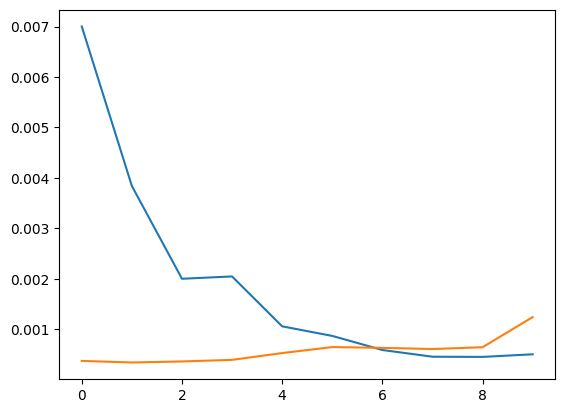

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
X_test_numeric = X_test_numeric.reshape(-1, lags, len(X_test_numeric[0]) // lags)

In [ ]:
preds = model.predict([X_test_numeric, X_test_text])

13/13 [==============================] - 2s 14ms/step


In [ ]:
preds = scaler.inverse_transform(preds)

In [ ]:
preds[preds < 0] = 0

In [ ]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(157042.8674440821, 315.7221569211271, 0.5892056016308105)

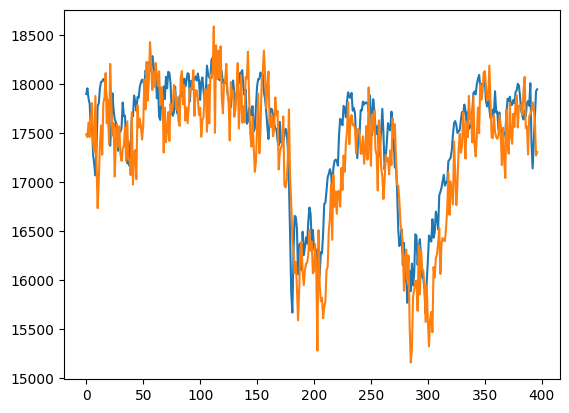

In [ ]:
plt.plot(Y_test.values)
plt.plot(preds)
plt.show()